# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [ ]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

I will try to minimize MSE(cost function) by differing Parameters using Gradient Descent function.

Hypothesis(Q) = Q0 + Q1*X1 + Q2*X2 + Q3*X3 + .......

Cost function = Mean Square Error

Gredient descent

Qj = Qj - alpha*(Costfunction)*Xj

In [ ]:
# 1.3.1.2
# implement Linear Regression
x_train_arr=np.array(x_train)
y=np.array(y_train)
print(type(y))
# print(y)
x_test_arr=np.array(x_test)
y_test_arr=np.array(y_test)
theta = np.zeros(26)
iterations_r = 100000000
alphaa = 0.1
m = len(x_train)
n = len(x_test)
X = np.vstack((np.ones((m,)), x_train_arr.T)).T
X_test = np.vstack((np.ones((n,)), x_test_arr.T)).T
print(X.shape)
print(y.shape)
print(theta.shape)
# print(X[0])


<class 'numpy.ndarray'>
(240, 26)
(240,)
(26,)


In [ ]:
def compute_cost(X,y,theta):
  J=0
  J=(1/(2*m))*np.sum((np.dot(X,theta)-y)**2)
  return J

In [ ]:
import math
def gradientDescent(X, y, theta, alpha, num_iters):
  theta = theta.copy()
  J_history = []
  for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        if compute_cost(X, y, theta) < math.pow(10,-6):
            J_history.append(compute_cost(X, y, theta))
            break;
        J_history.append(compute_cost(X, y, theta))
    
  return theta, J_history

In [ ]:
thetan, J_history = gradientDescent(X ,y, theta, alphaa, iterations_r)
print(J_history[-1])
# from sklearn import metrics
# # print(metrics.accuracy_score(np.dot(X_test,theta),y_test_arr))
# metrics.r2_score(np.dot(X_test,theta), y_test_arr)
y_pred = np.dot(X_test,thetan)
error = np.square(np.subtract(y_test,y_pred)).mean()
c=(1-error)*100
print(c)

9.99999359788668e-07
99.73812308917961


In [ ]:
# 1.3.2.3
# try with different learning rates and choose the best one
learn = []
xx = []
mini = pow(10,-5)
maxlearningrate = -1;
iterations = 300000
lamba = [0.01,0.1,1,10,100]
for i in lamba:
  theta, J_history = gradientDescent(X ,y, theta, i, iterations)
  # metrics.r2_score(np.dot(X_test,theta), y_test_arr)
  # print(i)
  
  y_predd = np.dot(X_test,theta)
  # errorrr = (1/X_test.shape[0])*np.sum(np.abs(y_predd - y_test))
  # ccc=(1-errorrr)*100
  if mini > J_history[-1]:
    mini = J_history[-1]
    maxlearningrate = i
    break
    
    # errorr = (1/X_test.shape[0])*np.sum(np.abs(y_predd - y_test))
    # cc=(1-errorr)*100
#   learn.append(i/100)
#   xx.append(J_history[-1])


# xpoints = np.array(learn)
# ypoints = np.array(xx)
print(maxlearningrate)
print(mini)

# plt.plot(xpoints, ypoints)




0.1
5.9059375275961654e-06


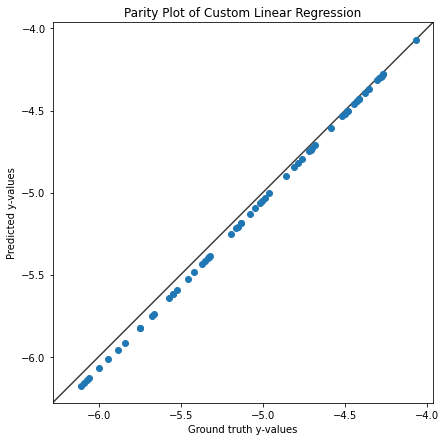

In [ ]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`
y_pred=np.dot(X_test,thetan)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`

Ridge regression is a type of regularization technique to reduce overfitting the data. We use the additional term Qj^2 to reduce the effect of the features which cause overfitting.  

In [ ]:
# 1.3.2.2
# you should not have imported sklearn before this point
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
from tabulate import tabulate
rmse_list =[]
alpha_list =[]
regg = Ridge(alpha=0.41).fit(x_train, y_train)
y_preddd = regg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_preddd,y_test))
print(r2_score(y_test,y_preddd))
print(rmse)
lamba = [0.0001,0.001,0.01,0.1,1,10]
for i in lamba:
    reg = Ridge(alpha=i).fit(x_train,y_train)
    y_pre = reg.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_pre,y_test))
    rmse_list.append(rmse)
    alpha_list.append(i/100)
    
data = {
  "alpha": alpha_list,
  "rmse": rmse_list
}

#load data into a DataFrame object:
df = pd.DataFrame(data)
# df.to_excel('ridge.xlsx')

print(tabulate(df, headers='keys', tablefmt='psql'))

# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

0.9891783765390588
0.06007844404725439
+----+---------+-----------+
|    |   alpha |      rmse |
|----+---------+-----------|
|  0 |  1e-06  | 0.146143  |
|  1 |  1e-05  | 0.0740614 |
|  2 |  0.0001 | 0.307387  |
|  3 |  0.001  | 0.109349  |
|  4 |  0.01   | 0.0708713 |
|  5 |  0.1    | 0.802039  |
+----+---------+-----------+


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

||y - Xw||^2_2 + alpha * ||w||^2_2

Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. With alpha set to zero, you will find that this is the equivalent of the linear regression model, and a larger value penalizes the optimization function. Therefore, ridge regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.

Alpha (α) can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is.

If Alpha is too high then it will underfit the model.

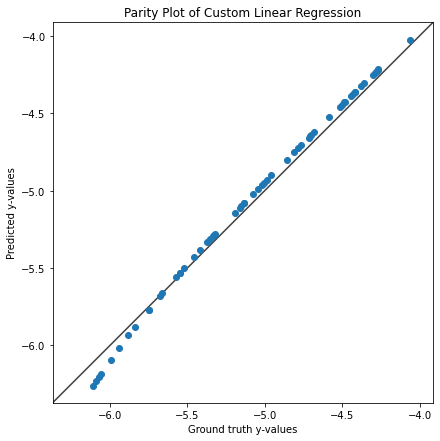

In [ ]:
# 1.3.2.4
y_preddd = regg.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_preddd)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

Lasso regression is a type of regularization technique to reduce overfitting the data. We use the additional term |Qj| to reduce the effect of the features which cause overfitting.  

In [ ]:
# 1.3.3.2
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

rmse_listt =[]
alpha_listt =[]
lamba = [0.0001,0.001,0.01,0.1,1,10]
for i in lamba:
    legg = Lasso(alpha=i).fit(x_train,y_train)
    y_prel = legg.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_prel,y_test))
    rmse_listt.append(rmse)
    alpha_listt.append(i)
    
dataa = {
  "alpha": alpha_listt,
  "rmse": rmse_listt
}

#load data into a DataFrame object:
dff = pd.DataFrame(dataa)
# df.to_excel('ridge.xlsx')

print(tabulate(dff, headers='keys', tablefmt='psql'))

+----+---------+----------+
|    |   alpha |     rmse |
|----+---------+----------|
|  0 |  0.0001 | 0.61249  |
|  1 |  0.001  | 0.179667 |
|  2 |  0.01   | 0.04242  |
|  3 |  0.1    | 0.414369 |
|  4 |  1      | 4.26993  |
|  5 | 10      | 4.99677  |
+----+---------+----------+


In [ ]:

leg = Lasso(alpha=0.01).fit(x_train, y_train)
y_predddd = leg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_predddd,y_test))
print(r2_score(y_test,y_predddd))
print(rmse)


0.9946049480974413
0.042419962550167355


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

||y - Xw||^2_2 + alpha * |w|

Alpha (α) is the penalty term that denotes the amount of shrinkage (or constraint) that will be implemented in the equation. With alpha set to zero, you will find that this is the equivalent of the linear regression model, and a larger value penalizes the optimization function. Therefore, lasso regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.

Alpha (α) can be any real-valued number between zero and infinity; the larger the value, the more aggressive the penalization is.

If Alpha is too high then it will underfit the model.

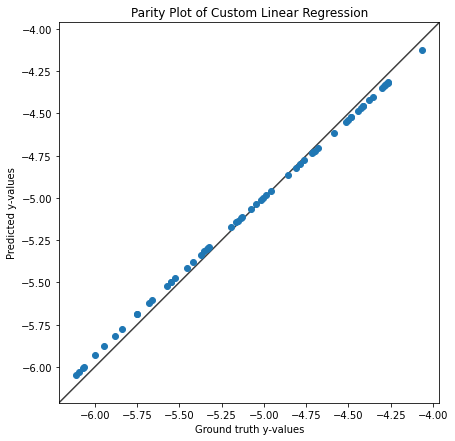

In [ ]:
# 1.3.3.4
y_predddd = leg.predict(x_test)
fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_predddd)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')
plt.show()